# Importing Libraries 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading dataset from csv

In [2]:
df=pd.read_csv('dataset.csv')


# Data overview

In [3]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

# Missing values 

In [5]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

### Visualising null values

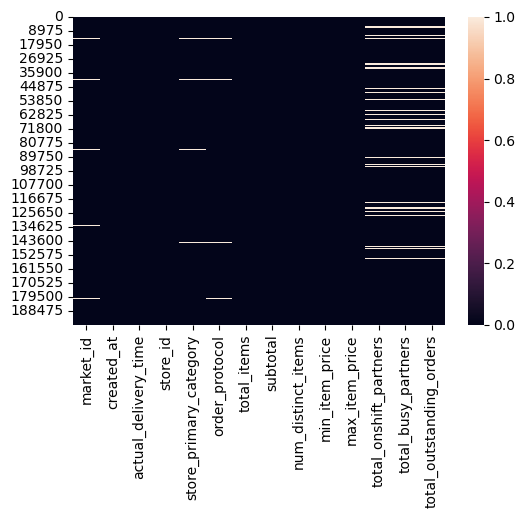

In [6]:
plt.figure(figsize=(6, 4)) 
sns.heatmap(df.isnull())
plt.show()

In [7]:
# percentage of missing values in each colm
(df.isnull().sum()/df.shape[0])*100

market_id                   0.499929
created_at                  0.000000
actual_delivery_time        0.003546
store_id                    0.000000
store_primary_category      2.411006
order_protocol              0.503981
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.236927
total_busy_partners         8.236927
total_outstanding_orders    8.236927
dtype: float64

# Handling Missing Values

In [8]:
# Columns with <1% missing values
low_null_cols = ['market_id', 'actual_delivery_time', 'order_protocol']

# Drop rows where these specific columns have NaN
df.dropna(subset=low_null_cols, inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print("Remaining missing values after selective drop:\n", df.isnull().mean()*100)
print("New dataset shape:", df.shape)


Remaining missing values after selective drop:
 market_id                   0.000000
created_at                  0.000000
actual_delivery_time        0.000000
store_id                    0.000000
store_primary_category      2.044139
order_protocol              0.000000
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      8.242908
total_busy_partners         8.242908
total_outstanding_orders    8.242908
dtype: float64
New dataset shape: (195926, 14)


In [9]:
# Fill categorical nulls
df['store_primary_category'].fillna('Unknown', inplace=True)

# Fill numerical nulls with median
num_cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Verify
print("Missing values after filling:\n", df.isnull().sum())


Missing values after filling:
 market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64


## Checking Duplicates

In [42]:
# Count duplicate rows
duplicates_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicates_count)


Number of duplicate rows: 0


## Datatype Modifications

In [52]:
# Convert to datetime
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])


## Creating New Columns

In [63]:

# Create target column: delivery duration in minutes
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
#create more columns:
df['order_hour'] = df['created_at'].dt.hour
df['order_weekday'] = df['created_at'].dt.weekday  
df['order_date'] = df['created_at'].dt.date
df['order_month'] = df['created_at'].dt.to_period('M')
df['order_year'] = df['created_at'].dt.year


df['busy_onshift_ratio'] = np.where(df['total_onshift_partners']>0,df['total_busy_partners']/df['total_onshift_partners'],np.nan)
df['orders_per_onshift_partner'] = np.where(df['total_onshift_partners']>0,df['total_outstanding_orders']/df['total_onshift_partners'],np.nan)

# Verify
print(df[['created_at', 'actual_delivery_time', 'delivery_duration']].head())


           created_at actual_delivery_time  delivery_duration
0 2015-02-06 22:24:17  2015-02-06 23:27:16          62.983333
1 2015-02-10 21:49:25  2015-02-10 22:56:29          67.066667
2 2015-01-22 20:39:28  2015-01-22 21:09:09          29.683333
3 2015-02-03 21:21:45  2015-02-03 22:13:00          51.250000
4 2015-02-15 02:40:36  2015-02-15 03:20:26          39.833333


## Stats Overview

In [64]:
#Summary Statistics
df.describe()

,market_id,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_duration,busy_onshift_ratio,orders_per_onshift_partner,order_hour,order_weekday,order_year
count,195925.000000,195925,195925,195925.000000,195925.000000,195925.000000,195925.000000,195925.000000,195925.000000,195925.000000,195925.000000,195925.000000,195925.000000,192310.000000,192310.000000,195925.000000,195925.000000,195925.000000
mean,2.978579,2015-02-04 21:59:33.746607616,2015-02-04 22:48:02.557049856,2.882179,3.194549,2682.226949,2.670843,686.262151,1159.582330,44.158362,41.097343,56.633926,48.480174,0.947727,1.209469,8.470828,3.219655,2014.999995
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,1.683333,-2.000000,-3.000000,0.000000,0.000000,2014.000000
25%,2.000000,2015-01-29 02:32:14,2015-01-29 03:22:13,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,19.000000,17.000000,19.000000,35.066667,0.843750,0.971831,2.000000,1.000000,2015.000000
50%,3.000000,2015-02-05 03:29:32,2015-02-05 04:41:05,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,44.333333,0.946565,1.159091,3.000000,3.000000,2015.000000
75%,4.000000,2015-02-12 01:39:34,2015-02-12 02:25:53,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,62.000000,59.000000,80.000000,56.366667,1.000000,1.444444,19.000000,5.000000,2015.000000
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,7.000000,84.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,141947.650000,31.000000,47.000000,23.000000,6.000000,2015.000000
std,1.524858,NaN,NaN,1.503727,2.505441,1823.346515,1.630761,522.216979,558.570565,33.139890,30.865041,50.658314,321.710655,0.385360,0.451516,8.659654,2.045621,0.002259


- **Average total items per order** = 3.19  
- **Average subtotal** = 2682 (with high variability of 1823)  
- **Max order size** = 411 items → possible cause of extreme outliers  

### 💡 Business Insight
Most of the orders are **small to medium-sized**, but in rare cases, **extreme orders distort averages** and can cause **delivery delays**.  
By **managing outlier orders** through special handling, the pressure on delivery partners can be reduced.


In [65]:
#Outlier removal as only one with max order size 411
df = df[df['total_items'] != 411]

## Distribution of Orders by Cuisine Category  

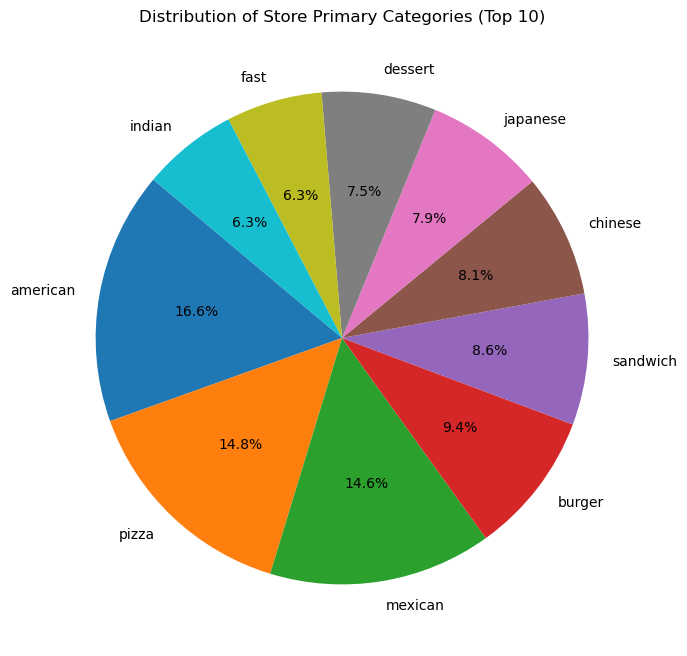

In [66]:
# 1. Pie Chart for Store Primary Category
store_counts = df['store_primary_category'].value_counts().head(10)  # top 10 categories
plt.figure(figsize=(8,8))
plt.pie(store_counts.values, labels=store_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Store Primary Categories (Top 10)")
plt.show()


## Distribution of Orders by Order Protocol  

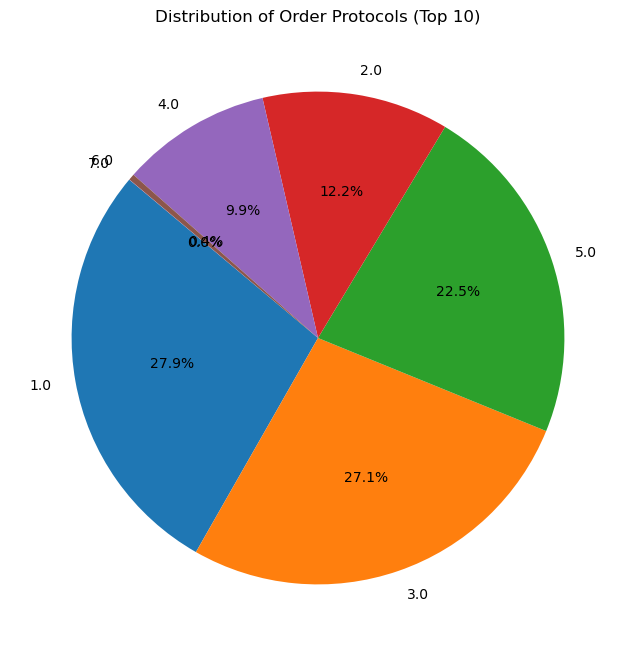

In [67]:

# 2. Pie Chart for Order Protocol
protocol_counts = df['order_protocol'].value_counts().head(10)  # top 10 protocols
plt.figure(figsize=(10,8))
plt.pie(protocol_counts.values, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Order Protocols (Top 10)")
plt.show()

## 📊 BUSINESS INSIGHT:  
Orders are concentrated in a few cuisines and protocols. Optimizing standard operating procedures for these top categories and protocols can have a disproportionate impact on reducing delivery times.


## Key Delivery Performance Metrics:  


In [68]:
kpis = {
    "median_delivery_time_min": df['delivery_duration'].median(),
    "p90_delivery_time_min": df['delivery_duration'].quantile(0.90),
    "on_time_rate_<=45min": (df['delivery_duration'] <= 45).mean() * 100,
    "median_busy_to_onshift": df['busy_onshift_ratio'].median(),
    "median_orders_per_partner": df['orders_per_onshift_partner'].median()
}
kpis


{'median_delivery_time_min': 44.333333333333336,
 'p90_delivery_time_min': 70.58333333333333,
 'on_time_rate_<=45min': 51.72285313257624,
 'median_busy_to_onshift': 0.9465648854961832,
 'median_orders_per_partner': 1.1590909090909092}

## *Numeric values which we get are:*
- median delivery time = 44 minutes
- p90 = 71 minutes
- on time rate = 51.7%
- median of busy to onshift = 0.95
- median of orders per partner = 1.16


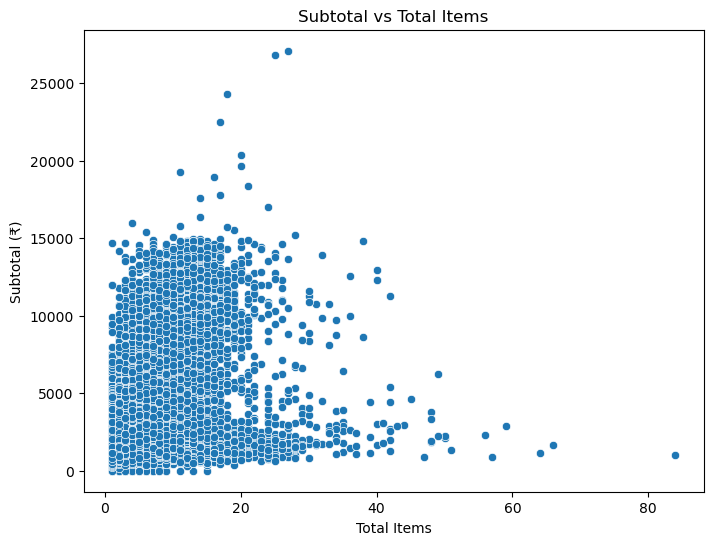

In [69]:
#Subtotal vs Total Items (continuous vs continuous → scatterplot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='total_items', y='subtotal', data=df)
plt.title("Subtotal vs Total Items")
plt.xlabel("Total Items")
plt.ylabel("Subtotal (₹)")
plt.show()


### Distribution Plot For various Continous Variables

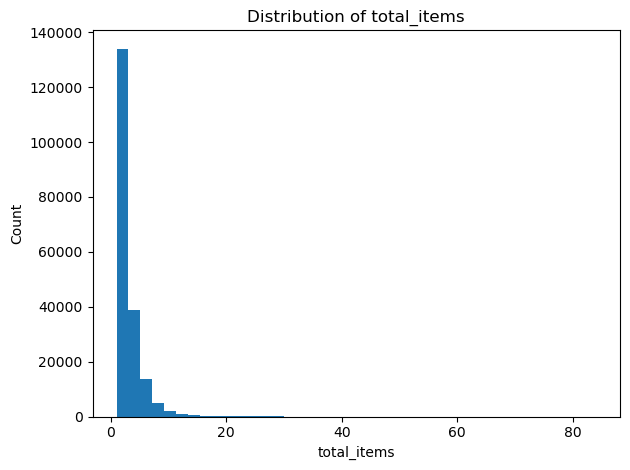

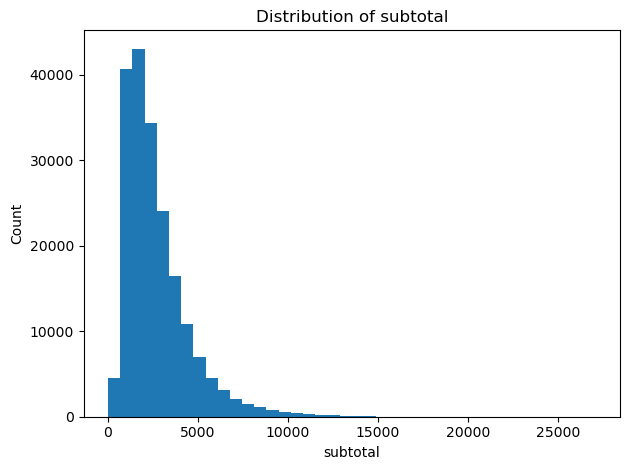

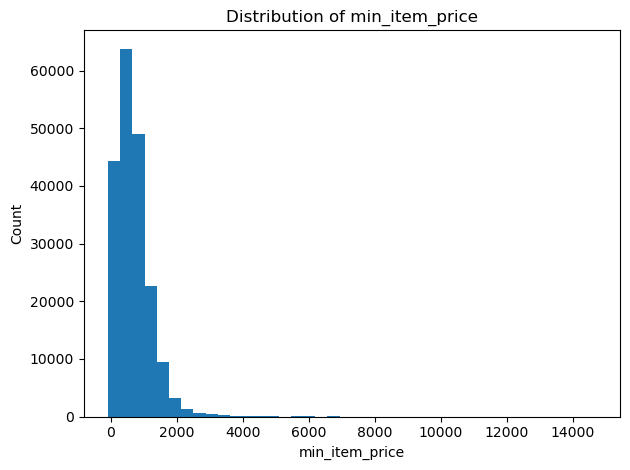

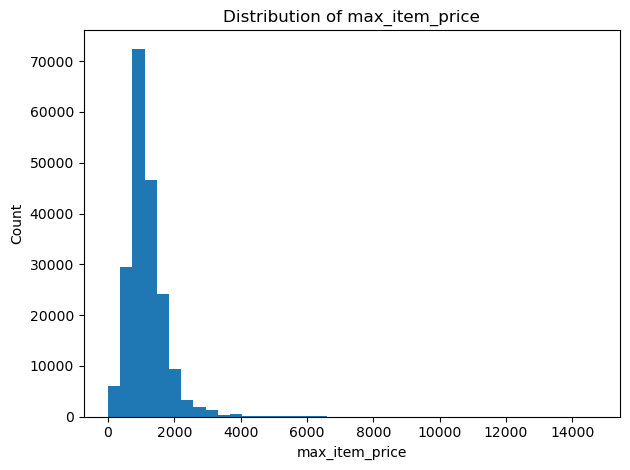

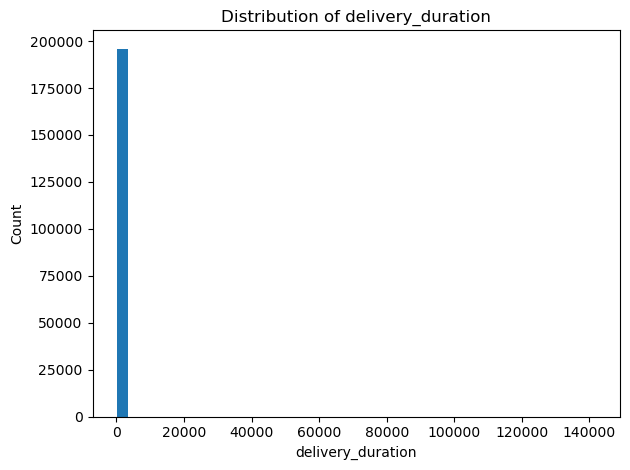

In [70]:
cont_cols = [c for c in ["total_items", "subtotal", "min_item_price", "max_item_price", "delivery_duration"] if c in df.columns]
for c in cont_cols:
    df[c].plot(kind="hist", bins=40)
    plt.title(f"Distribution of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

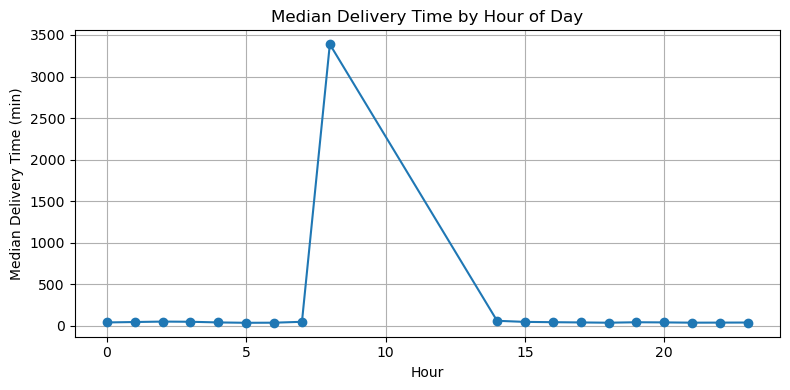

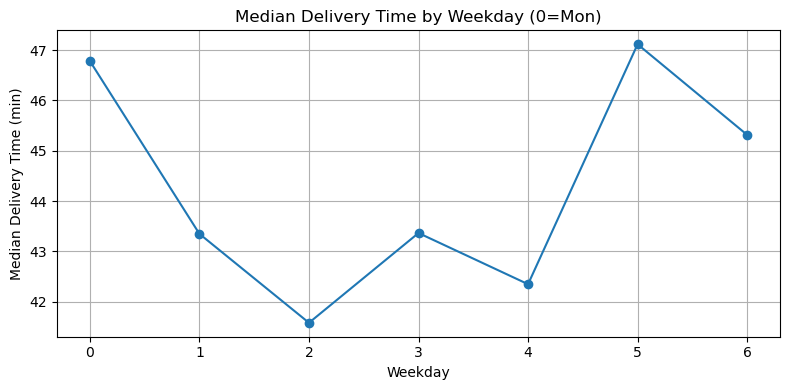

In [71]:
hourly = df.groupby('order_hour')['delivery_duration'].median()
plt.figure(figsize=(8,4)) 
plt.plot(hourly.index, hourly.values, marker='o')
plt.title("Median Delivery Time by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Median Delivery Time (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

weekday = df.groupby('order_weekday')['delivery_duration'].median()
plt.figure(figsize=(8,4))
plt.plot(weekday.index, weekday.values, marker='o')
plt.title("Median Delivery Time by Weekday (0=Mon)")
plt.xlabel("Weekday")
plt.ylabel("Median Delivery Time (min)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Business Insight:

- Median delivery times tend to increase during lunch and dinner hours.  
- Weekly trends indicate that weekends perform slightly worse compared to weekdays.  
- Customer demand peaks around meal times. Without proactive supply adjustments, delays are likely. Weekends especially require additional partner availability to maintain service levels.


## WorkLoad vs DeliveryTime

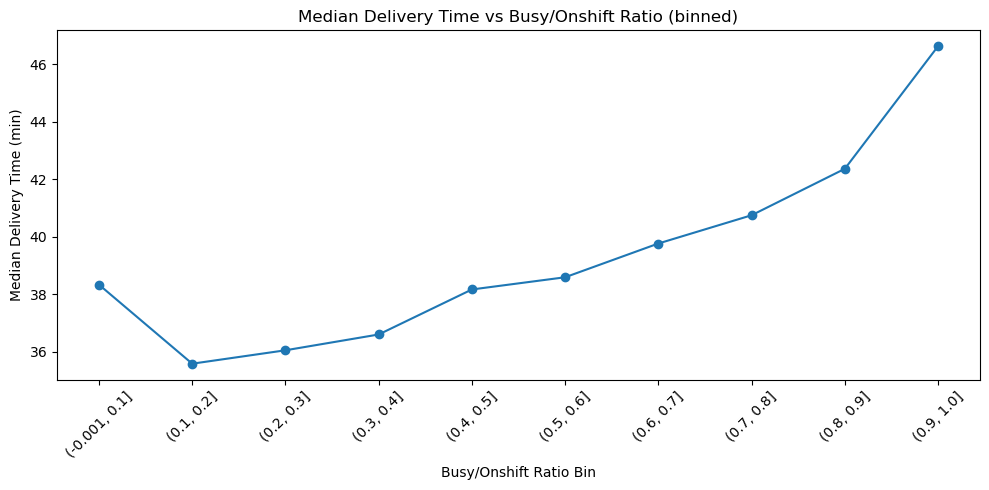

In [72]:
bins = np.linspace(0,1,11)
df['workload_bin'] = pd.cut(df['busy_onshift_ratio'], bins=bins, include_lowest=True)
workload_median = df.groupby('workload_bin')['delivery_duration'].median()
plt.figure(figsize=(10,5))
plt.plot(range(len(workload_median)), workload_median.values, marker='o')
plt.xticks(range(len(workload_median)), [str(b) for b in workload_median.index], rotation=45)
plt.title("Median Delivery Time vs Busy/Onshift Ratio (binned)")
plt.xlabel("Busy/Onshift Ratio Bin")
plt.ylabel("Median Delivery Time (min)")
plt.tight_layout()
plt.show()

### BUSINESS INSIGHT:
As busy/onshift ratio bin increases delivery time will also become worse it should control intake or surge supply.

# SLA Breach / Delay Risk Analysis:

In [76]:
# Define SLA (45 minutes here, change if needed)
SLA = 45
df['delayed'] = (df['delivery_duration'] > SLA).astype(int)


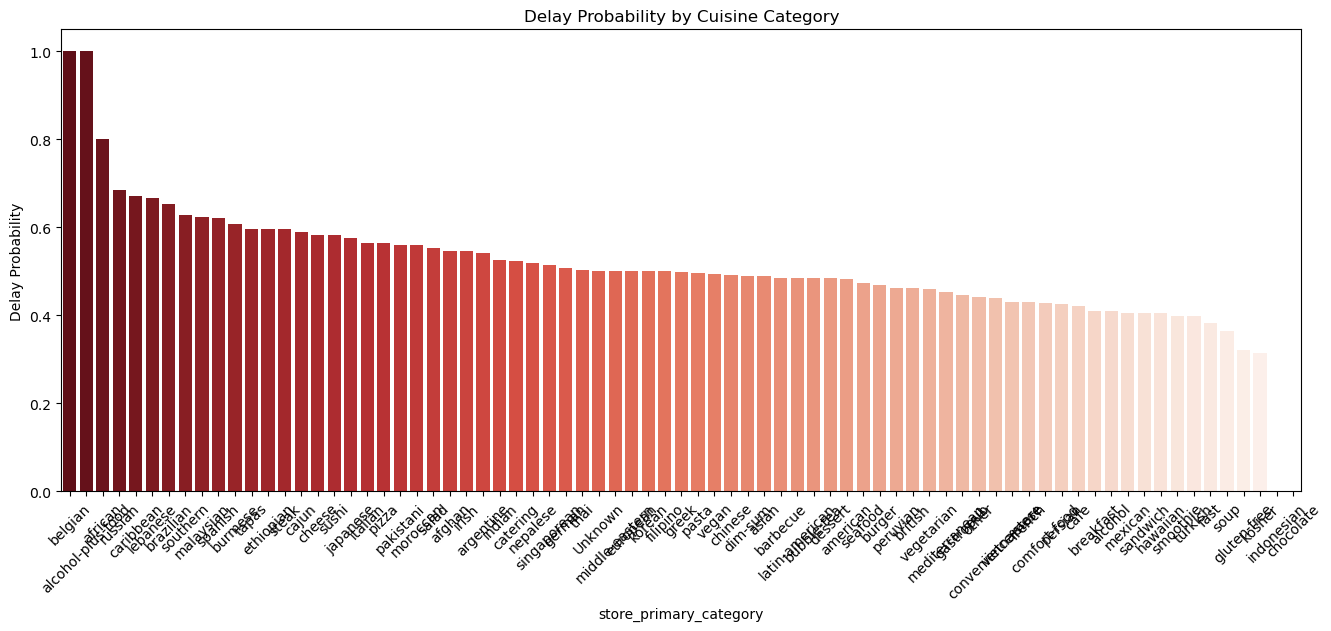

In [78]:
delay_by_cuisine = df.groupby('store_primary_category')['delayed'].mean().sort_values(ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(x=delay_by_cuisine.index, y=delay_by_cuisine.values, palette="Reds_r")
plt.xticks(rotation=45)
plt.ylabel("Delay Probability")
plt.title("Delay Probability by Cuisine Category")
plt.show()


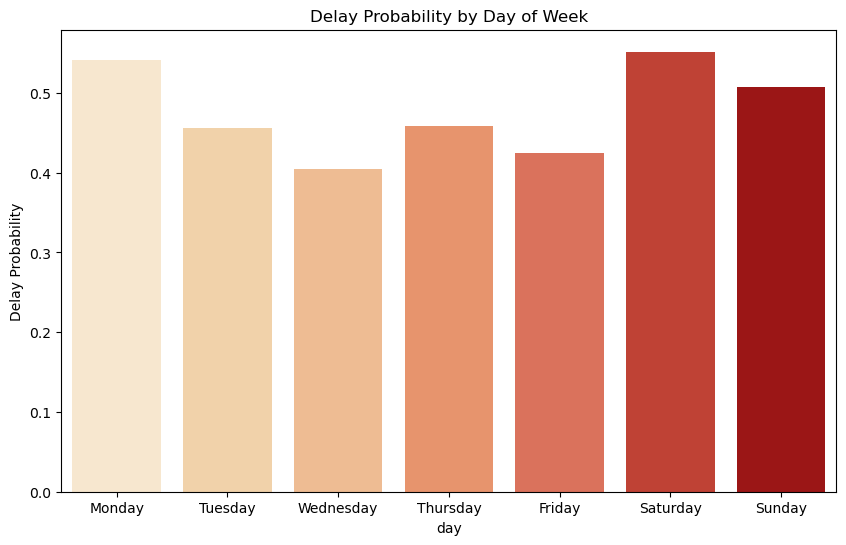

In [79]:
df['day'] = df['created_at'].dt.day_name()

delay_by_day = df.groupby('day')['delayed'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(10,6))
sns.barplot(x=delay_by_day.index, y=delay_by_day.values, palette="OrRd")
plt.ylabel("Delay Probability")
plt.title("Delay Probability by Day of Week")
plt.show()


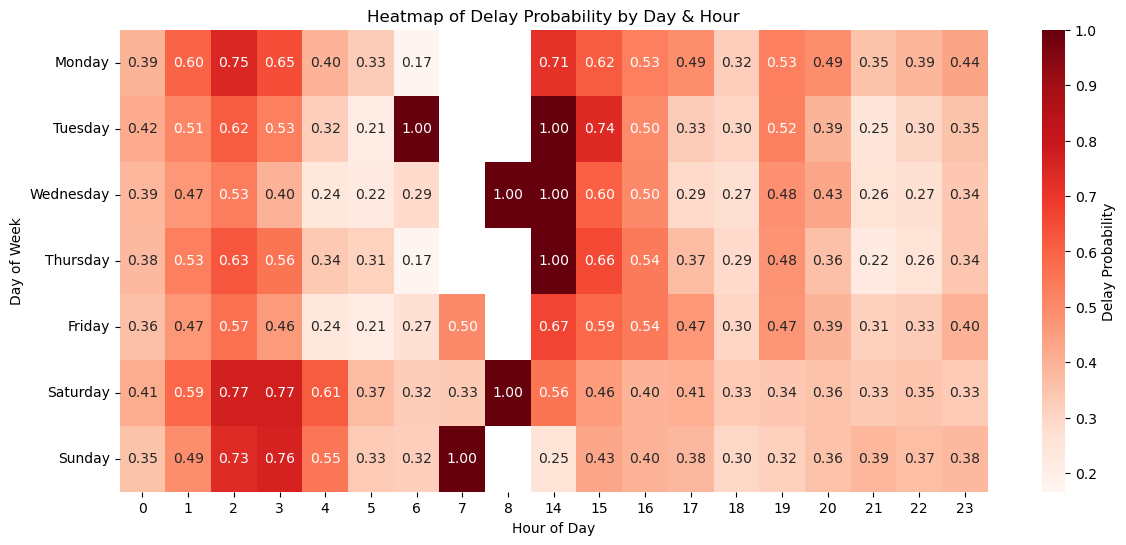

In [83]:

# Pivot table of delay probability
pivot_delay = df.pivot_table(values='delayed', index='day', columns='order_hour', aggfunc='mean')

# Reorder days
pivot_delay = pivot_delay.reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

plt.figure(figsize=(14,6))
sns.heatmap(pivot_delay, cmap="Reds", annot=True, fmt=".2f", cbar_kws={'label': 'Delay Probability'})
plt.title("Heatmap of Delay Probability by Day & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()